In [53]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 120

from PIL import Image

# My custom library of photoelastic tools
import sys
#sys.path.append('/eno/jdfeathe/pepe/')
sys.path.append('/home/jack//workspaces/jupyter-workspace/pepe/')
from pepe.preprocess import crossMask, checkImageType, circularMask, lightCorrectionDiff, rectMask, mergeMasks

In [56]:
rootFolder = '/run/media/jack/Seagate Portable Drive/Research/SpaceJam/'
#rootFolder = '/eno/jdfeathe/DATA/SpaceJam/'

# Create a mask over the image, that will also be used to detect the boundary
#maskXBounds = [430, 760] # Found manually
#maskYBounds = [340, 670] # Found manually
maskXBounds = [390, 710] # Found manually
maskYBounds = [350, 680] # Found manually

#sampleImage = checkImageType(rootFolder + '2022-02-22_Calibration.bmp') 
sampleImage = checkImageType(rootFolder + '2022-02-22_Wide_Half_Green/frame0001.bmp') 

# For light correction, we want two separate images, one vertical and one horizontal
height, width = sampleImage.shape[:2]
verticalMask = np.array([[int(i < maskXBounds[1] and i > maskXBounds[0]) for i in range(width)] for j in range(height)], dtype=np.uint8)
horizontalMask = np.array(np.transpose([[int(i < maskYBounds[1] and i > maskYBounds[0]) for i in range(height)] for j in range(width)]), dtype=np.uint8)

verticalMask = np.repeat(verticalMask[:,:,None], 3, axis=-1)
horizontalMask = np.repeat(horizontalMask[:,:,None], 3, axis=-1)

fullMask = crossMask(sampleImage.shape, xlim=np.array(maskXBounds), ylim=np.array(maskYBounds))

# Add in the pegs on the boundary particles
#pegCenters = [[20, 550], [20, 650], [990, 540], [990, 650]] # Found manually
pegCenters = [[40, 500], [40, 600], [990, 500], [990, 600]] # Found manually
pegRadii = 15

for i in range(len(pegCenters)):
    fullMask = fullMask - circularMask(sampleImage.shape, np.array(pegCenters[i]), pegRadii)
    
fullMask = np.array(fullMask > 0, dtype=np.uint8)

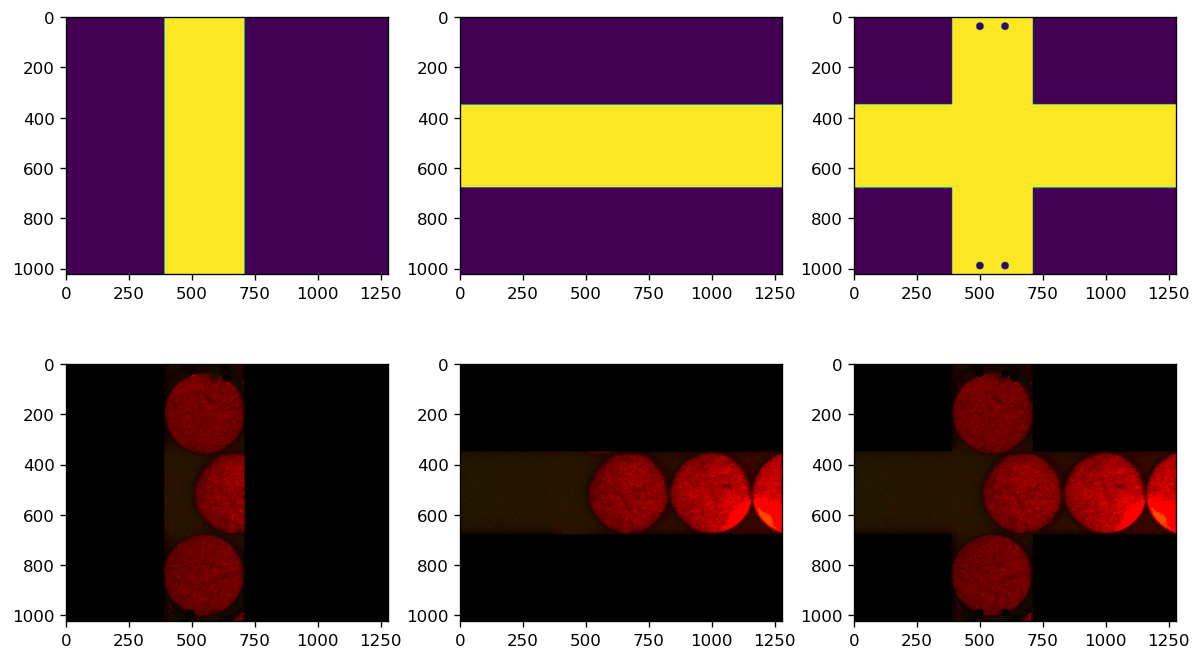

In [57]:
fig, ax = plt.subplots(2, 3, figsize=(10,6))

ax[0,0].imshow(verticalMask[:,:,0])
ax[0,1].imshow(horizontalMask[:,:,0])
ax[0,2].imshow(fullMask[:,:,0])

ax[1,0].imshow(verticalMask * sampleImage)
ax[1,1].imshow(horizontalMask * sampleImage)
ax[1,2].imshow(fullMask * sampleImage)


fig.tight_layout()
plt.show()

In [60]:
fullMaskImg = Image.fromarray(fullMask)
verticalMaskImg = Image.fromarray(verticalMask)
horizontalMaskImg = Image.fromarray(horizontalMask)

fullMaskImg.save('Masks/2022-02-22_FullMask.bmp')
verticalMaskImg.save('Masks/2022-02-22_VerticalMask.bmp')
horizontalMaskImg.save('Masks/2022-02-22_HorizontalMask.bmp')